In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Step 1: Load Healthcare Dataset
# Simulating a healthcare dataset with patient diagnoses


In [2]:
# Load the data from CSV file
data = pd.read_csv('healthcare_data.csv')

In [3]:
# Step 2: Data Preprocessing

# Convert the 'Diagnoses' column into a list of transactions
import ast

data['Diagnoses'] = data['Diagnoses'].apply(ast.literal_eval)  # Convert string representation of list back to list
transactions = data['Diagnoses'].tolist()

# Apply TransactionEncoder to prepare the dataset for Apriori
te = TransactionEncoder()
transaction_data = te.fit_transform(transactions)
transaction_df = pd.DataFrame(transaction_data, columns=te.columns_)


In [5]:
data['Diagnoses'].head()

0             [Hypertension, Diabetes]
1                    [Asthma, Allergy]
2                  [Diabetes, Obesity]
3               [Hypertension, Asthma]
4    [Diabetes, Hypertension, Obesity]
Name: Diagnoses, dtype: object

In [6]:
transaction_df.head()


Allergy  Asthma  Diabetes  Heart Disease  Hypertension  Obesity
0    False   False      True          False          True    False
1     True    True     False          False         False    False
2    False   False      True          False         False     True
3    False    True     False          False          True    False
4    False   False      True          False          True     True

In [7]:
# Step 3: Analysis - Finding Rules to Predict Diagnoses

# Apply the Apriori algorithm to find frequent itemsets with a lower support threshold
frequent_itemsets = apriori(transaction_df, min_support=0.2, use_colnames=True)

# Generate association rules with a focus on predicting diagnoses
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Limit the number of rules to avoid overwhelming memory usage
target_rules = rules.sort_values(by='support').head(10)

# Display the first few target prediction rules
target_rules = target_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print("Target Prediction Rules (Co-occurring Diagnoses):")
print(target_rules)

Target Prediction Rules (Co-occurring Diagnoses):
       antecedents     consequents  support  confidence      lift
2        (Obesity)      (Diabetes)      0.2    0.666667  1.333333
3  (Heart Disease)  (Hypertension)      0.2    1.000000  2.000000
0   (Hypertension)      (Diabetes)      0.3    0.600000  1.200000
1       (Diabetes)  (Hypertension)      0.3    0.600000  1.200000


In [8]:
# Step 4: Analysis - Finding Diagnoses That Occur Together

# Generate association rules to discover diagnoses that occur together
Lift_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Limit the number of supervised rules to avoid overwhelming memory usage
Lift_rules = Lift_rules.sort_values(by='support').head(10)

# Display the first few rules showing diagnoses that occur together
Lift_rules = Lift_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print("Rules Showing Diagnoses That Occur Together:")
print(Lift_rules)

Rules Showing Diagnoses That Occur Together:
       antecedents      consequents  support  confidence      lift
2       (Diabetes)        (Obesity)      0.2    0.400000  1.333333
3        (Obesity)       (Diabetes)      0.2    0.666667  1.333333
4  (Heart Disease)   (Hypertension)      0.2    1.000000  2.000000
5   (Hypertension)  (Heart Disease)      0.2    0.400000  2.000000
0   (Hypertension)       (Diabetes)      0.3    0.600000  1.200000
1       (Diabetes)   (Hypertension)      0.3    0.600000  1.200000


In [9]:
# Step 5: Goodness of Rules - Support, Confidence, and Lift

# Evaluate the goodness of rules
print("\nGoodness of Rules (Co-occurring Diagnoses):")
print(target_rules[['support', 'confidence', 'lift']])

print("\nGoodness of Lift Rules (Diagnoses Occurring Together):")
print(Lift_rules[['support', 'confidence', 'lift']])



Goodness of Rules (Co-occurring Diagnoses):
   support  confidence      lift
2      0.2    0.666667  1.333333
3      0.2    1.000000  2.000000
0      0.3    0.600000  1.200000
1      0.3    0.600000  1.200000

Goodness of Lift Rules (Diagnoses Occurring Together):
   support  confidence      lift
2      0.2    0.400000  1.333333
3      0.2    0.666667  1.333333
4      0.2    1.000000  2.000000
5      0.2    0.400000  2.000000
0      0.3    0.600000  1.200000
1      0.3    0.600000  1.200000


In [13]:
# Step 6: Save the Rules for Further Analysis
# Save the target prediction rules to a CSV file
target_rules.to_csv('healthcare_target_prediction_rules.csv', index=False)

# Save the supervised rules to a CSV file
Lift_rules.to_csv('healthcare_diagnoses_occurring_together_rules.csv', index=False)

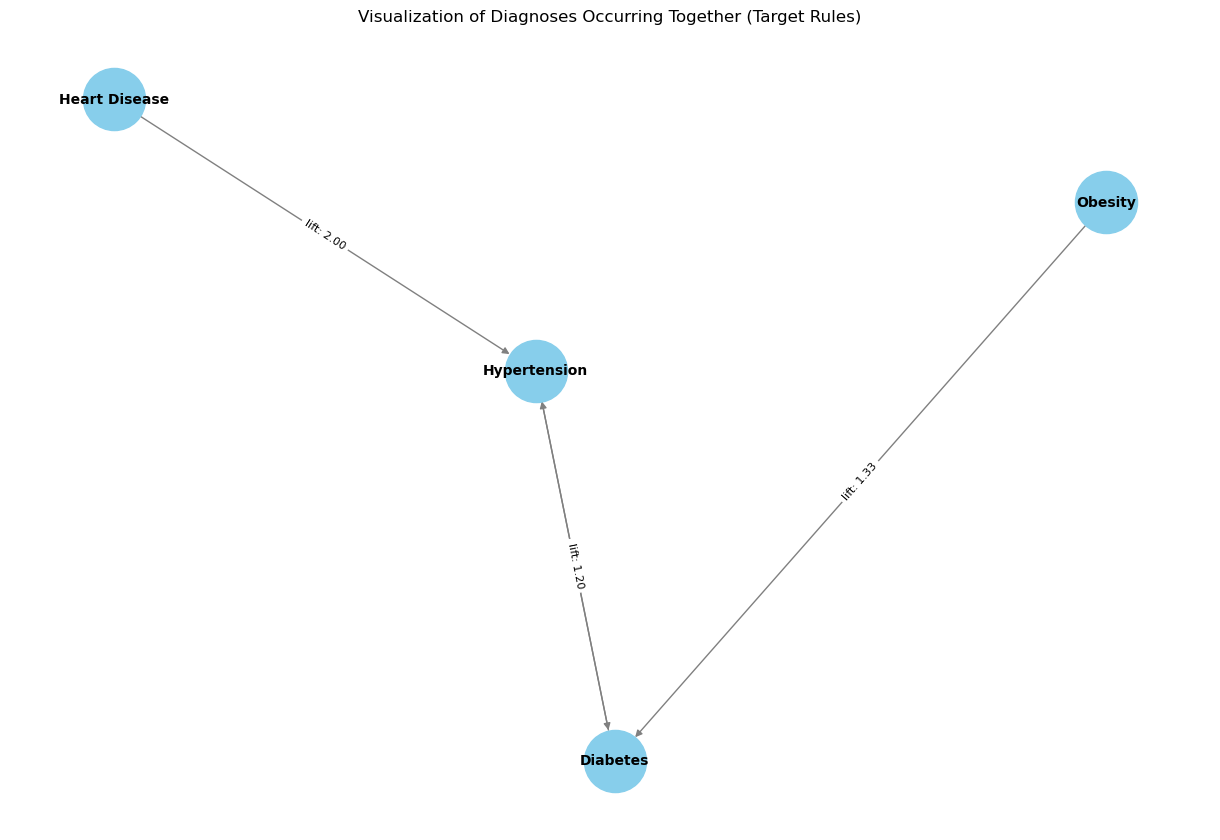

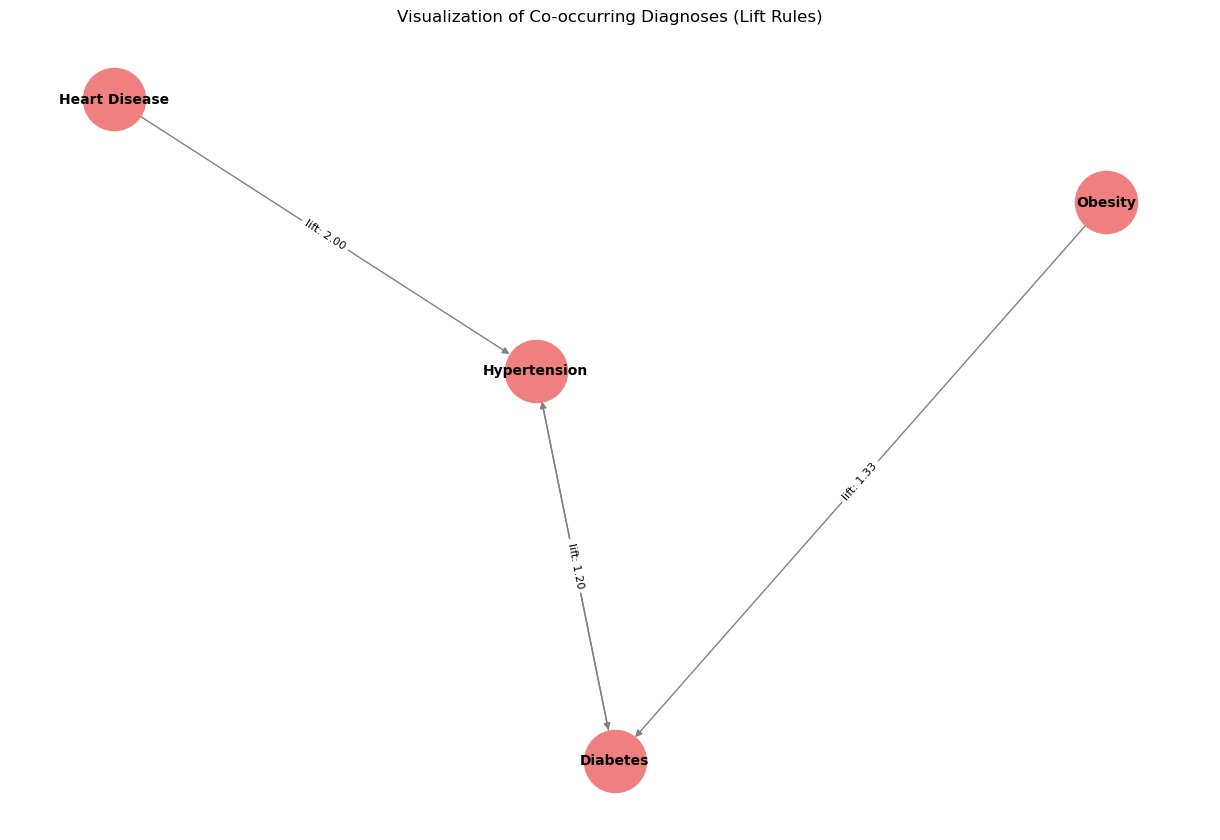

In [12]:
# Step 7: Visualization

# Visualization of Supervised Rules - Diagnoses Occurring Together
plt.figure(figsize=(12, 8))
G = nx.DiGraph()

for _, row in target_rules.iterrows():
    for ant in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ant, cons, weight=row['lift'])

pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, font_weight='bold', node_color='skyblue', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"lift: {d['weight']:.2f}" for u, v, d in G.edges(data=True)}, font_size=8)
plt.title('Visualization of Diagnoses Occurring Together (Target Rules)')
plt.show()

# Visualization of Unsupervised Rules - Co-occurring Diagnoses
plt.figure(figsize=(12, 8))
G = nx.DiGraph()

for _, row in target_rules.iterrows():
    for ant in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ant, cons, weight=row['lift'])

pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, font_weight='bold', node_color='lightcoral', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"lift: {d['weight']:.2f}" for u, v, d in G.edges(data=True)}, font_size=8)
plt.title('Visualization of Co-occurring Diagnoses (Lift Rules)')
plt.show()
